Maxwell showed in 1858 that the magnification needs to equal the ratio of refractive indices to have a perfect 3D imaging system
$$
|M| = \frac{n_1}{n_2}
$$
Abbe Sine Condition for aberration free imaging:
M is the magnification of the system
$$
M = \frac{\sin\alpha_o}{\sin\alpha_i}=\frac{\sin\beta_o}{\sin\beta_i}
$$

Herschel's Condition for aberration free imaging:
H is the axial magnification
$$
H = \frac{n_o \sin^2 (\frac{\theta_o}{2})}{n_i \sin^2(\frac{\theta_i}{2})}
$$



We can calculate the overall system magnification for the first 2 microscopes that satisfies the Sine Condition and Herschel's Conditions.<br> <br>In snouty n<sub>2</sub> is air so R.I = 1, and people have just left it off. For others like SCAPE, n<sub>2</sub> may also be water. (1.33). <br>It is better to be explicit than implicit.
$$
M = \frac{n_1}{n_2} = \frac{M_1SL_2TL_1}{M_2SL_1TL_2}
$$
We can solve for an unknown tube length, given the Objectives, refractive indicies and other 3 lenses in the scan relay.
$$
TL_2=\frac{M_1n_2SL_2TL_1}{M_2n_1SL_1}
$$



In [7]:
# 100x Oil Objective and 40x Air into Snouty, with RI = 1.33 (Water matched)
m1 = 100
t1 = 200
s1 = 75
s2 = 75
m2 = 40
r1 = 1.3330 # water
r2 = 1 #air

tl2 = (m1*r2*s2*t1)/(r1*m2*s1)
H = (m1*s2*t1)/(m2*s1*tl2)
print('System Magnification: ', H)
print("Need TL_2= ", tl2)

System Magnification:  1.3330000000000002
Need TL_2=  375.0937734433608


## Luckily for us. We can use two 750mm lenses back to back to make a 375mm lens.

For two thin lenses if collimated light enters from the left to right it will be focused at the 'back focal length' Given by the following:
$$
bfl = \frac{f_2*(d-f_1)}{d-(f_1+f_2)}
$$

The effective focal length is given by the following:
$$
EFL = bfl + d
$$

This tells us how far apart the lenses will be and where the focus of the overall lens pair is.

In [96]:
f1 = 750
f2 = 750
d = 0

bfl = f2*(d-f1)/(d-(f1+f2))
print(f'EFL for 2x 750 mm as Plossl: {bfl} mm')

EFL for 2x 750 mm as Plossl: 375.0 mm


## Plossl-style arrangement to make compound lens (d=0)

In [93]:
import numpy as np
import pandas as pd
# f1 is all of the stock optics from thorlabs
f1 = np.array([75,80,100,150,180,200,250,300,400,500,750])
f2 = f1
d = 0

bfl = f2*(d-f1)/(d-(f1+f2))

efl = [f2*(d-f1)/(d-(f1+f2)) for f1 in f1]
df_m = pd.DataFrame(np.column_stack((f1, f2, bfl)), columns=['L1', 'L2', 'EFD'])
print(f'Matched Focal Lengths:\n{df_m}')

df_a = pd.DataFrame(np.round(efl,2),columns=f1,index=f2)
print(f'\nAll Focal Lengths:\n {df_a}')

Matched Focal Lengths:
       L1     L2    EFD
0    75.0   75.0   37.5
1    80.0   80.0   40.0
2   100.0  100.0   50.0
3   150.0  150.0   75.0
4   180.0  180.0   90.0
5   200.0  200.0  100.0
6   250.0  250.0  125.0
7   300.0  300.0  150.0
8   400.0  400.0  200.0
9   500.0  500.0  250.0
10  750.0  750.0  375.0

All Focal Lengths:
        75     80     100     150     180     200     250     300     400  \
75   37.50  38.71  42.86   50.00   52.94   54.55   57.69   60.00   63.16   
80   38.71  40.00  44.44   52.17   55.38   57.14   60.61   63.16   66.67   
100  42.86  44.44  50.00   60.00   64.29   66.67   71.43   75.00   80.00   
150  50.00  52.17  60.00   75.00   81.82   85.71   93.75  100.00  109.09   
180  52.94  55.38  64.29   81.82   90.00   94.74  104.65  112.50  124.14   
200  54.55  57.14  66.67   85.71   94.74  100.00  111.11  120.00  133.33   
250  57.69  60.61  71.43   93.75  104.65  111.11  125.00  136.36  153.85   
300  60.00  63.16  75.00  100.00  112.50  120.00  136.36  15

These serve as the sanity check I needed to add a wrinkle to the smooth brain

In [ ]:
# 100x Silicon Oil (1.4) and 40x Air Objectives into snouty Original Snouty
m1 = 100
t1 = 200
s1 = 70
s2 = 39
t2 = 200
m2 = 40

magnification = (t1/s1) * (s2/t2) / (m2/m1)
print('System Magnification: ', magnification)


In [ ]:
# 100x Si Oil Objective and 40x Air into Snouty, with RI = 1.40 (SiO matched)
# https://arxiv.org/pdf/2208.13854.pdf
m1 = 100
t1 = 200
s1 = 70
s2 = 70
t2 = 357
m2 = 40
RI = 1.40

H = (m1*s2*t1)/(m2*s1*t2)
tl2 = (m1*s2*t1)/(RI*m2*s1)
print('System Magnification: ', H)
print("Need TL_2= ", tl2)

In [ ]:
# 100x Si Oil Objective and 40x Air into Snouty, with RI = 1.40 (SiO matched)
m1 = 100
t1 = 200
s1 = 100
s2 = 100
t2 = 357
m2 = 40

magnification = (t1/s1) * (s2/t2) / (m2/m1)
print('System Magnification: ', magnification)


In [ ]:
# HT Snouty
# 40x Air Objective and 20x Air into Snouty, with RI = 1.33 (Water matched)
m1 = 40
t1 = 200
s1 = 100
s2 = 100
t2 = 300
m2 = 20

magnification = (t1/s1) * (s2/t2) / (m2/m1)
print('System Magnification: ', magnification)

In [ ]:
#HT-Snouty V2
# 40x Air Objectives into Snouty, with RI = 1.33 (Water matched)
m1 = 40
t1 = 200
s1 = 100
s2 = 100
t2 = 150
m2 = 40

magnification = (t1/s1) * (s2/t2) / (m2/m1)
print('System Magnification: ', magnification)


In [45]:
#SCAPE2.0 configuration
m1 = 20
tl1 = 150
sl1 = 75
sl2 = 60
tl2 = 100
m2 = 20

magnification = (tl1/sl1) * (sl2/tl2) / (m2/m1)

print('System Magnification: ', magnification)

System Magnification:  1.2


In [50]:
# Alternative Configuration for SCAPE:

m1=20
t1=150
s1=75
s2=75
t2=150
m2=20

magnification = (t1/s1) * (s2/t2) / (m2/m1)
print('System Magnification: ', magnification)


System Magnification:  1.0


In [49]:
# Alternative Configuration (O1 is water O2 is air)
m1 = 20
t1 = 200
s1 = 75
s2 = 75
t2 = 150
m2 = 20

magnification = (t1/s1) * (s2/t2) / (m2/m1)
print('System Magnification: ', magnification)


System Magnification:  1.3333333333333333


## Plossl-style arrangement to make compound lens (d=0)

In [85]:
import numpy as np
import pandas as pd
# f1 is all of the stock optics from thorlabs
f1 = np.array([75,80,100,150,180,200,250,300,400,500,750])
f2 = f1
d = 0

bfl = f2*(d-f1)/(d-(f1+f2))

efl = [f2*(d-f1)/(d-(f1+f2)) for f1 in f1]
df_m = pd.DataFrame(np.column_stack((f1, f2, bfl)), columns=['L1', 'L2', 'EFD'])
print(f'Matched Focal Lengths:\n{df_m}')

df_a = pd.DataFrame(np.round(efl,2),columns=f1,index=f2)
print(f'\nAll Focal Lengths:\n {df_a}')


Matched Focal Lengths:
       L1     L2    EFD
0    75.0   75.0   37.5
1    80.0   80.0   40.0
2   100.0  100.0   50.0
3   150.0  150.0   75.0
4   180.0  180.0   90.0
5   200.0  200.0  100.0
6   250.0  250.0  125.0
7   300.0  300.0  150.0
8   400.0  400.0  200.0
9   500.0  500.0  250.0
10  750.0  750.0  375.0

All Focal Lengths:
        75     80     100     150     180     200     250     300     400  \
75   37.50  38.71  42.86   50.00   52.94   54.55   57.69   60.00   63.16   
80   38.71  40.00  44.44   52.17   55.38   57.14   60.61   63.16   66.67   
100  42.86  44.44  50.00   60.00   64.29   66.67   71.43   75.00   80.00   
150  50.00  52.17  60.00   75.00   81.82   85.71   93.75  100.00  109.09   
180  52.94  55.38  64.29   81.82   90.00   94.74  104.65  112.50  124.14   
200  54.55  57.14  66.67   85.71   94.74  100.00  111.11  120.00  133.33   
250  57.69  60.61  71.43   93.75  104.65  111.11  125.00  136.36  153.85   
300  60.00  63.16  75.00  100.00  112.50  120.00  136.36  15

Plossl-type with 20 mm separation. Another sanity check

In [86]:
d=20
efl = [f2*(d-f1)/(d-(f1+f2)) for f1 in f1]
df = pd.DataFrame(efl, columns=f1, index=f2)
print('\n', df)


            75         80         100         150         180         200  \
75   31.730769  32.592593  35.483871   40.243902   42.127660   43.137255   
80   33.333333  34.285714  37.500000   42.857143   45.000000   46.153846   
100  38.709677  40.000000  44.444444   52.173913   55.384615   57.142857   
150  47.560976  49.523810  56.521739   69.642857   75.483871   78.787879   
180  51.063830  53.333333  61.538462   77.419355   84.705882   88.888889   
200  52.941176  55.384615  64.285714   81.818182   90.000000   94.736842   
250  56.557377  59.354839  69.696970   90.789474  100.975610  106.976744   
300  59.154930  62.222222  73.684211   97.674419  109.565217  116.666667   
400  62.637363  66.086957  79.166667  107.547170  122.142857  131.034483   
500  64.864865  68.571429  82.758621  114.285714  130.909091  141.176471   
750  68.012422  72.098765  87.951807  124.431818  144.395604  156.989247   

            250         300         400         500         750  
75    45.081967   4

Closest EFL: 375.0 Separation distance: 0.0 Back Focal Length 375.0


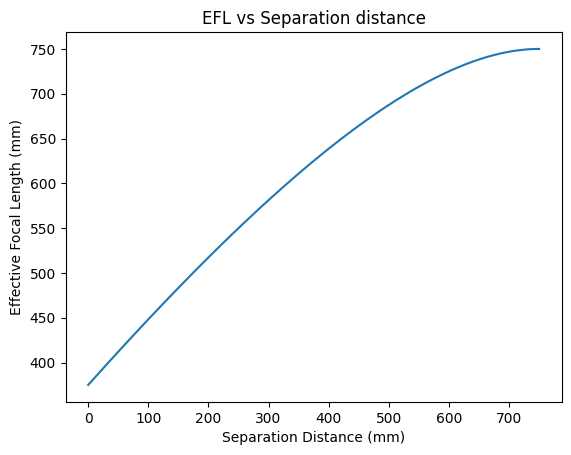

In [90]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
f1 = 750
f2 = 750
desired_efl = 375

def calculate_efl(f1, f2, desired_efl):
    d = np.linspace(0, f2, 1001)

    bfl = f2*(d-f1)/(d-(f1+f2))
    efl = bfl+d

    closest = efl.flat[np.abs(efl - desired_efl).argmin()]
    idx = int(np.where(efl == closest)[0])
    opt_d = d[idx]
    opt_bfl = bfl[idx]

    print(f'Closest EFL: {closest} Separation distance: {opt_d} Back Focal Length { opt_bfl}')
    df_m = pd.DataFrame({"efl":efl,'distance':d})

    df_m.plot(x='distance',y='efl',title='EFL vs Separation distance',xlabel='Separation Distance (mm)',ylabel='Effective Focal Length (mm)',legend=False)

calculate_efl(f1,f2,desired_efl)


Closest EFL: 375.0 Separation distance: 0.0 Back Focal Length 375.0


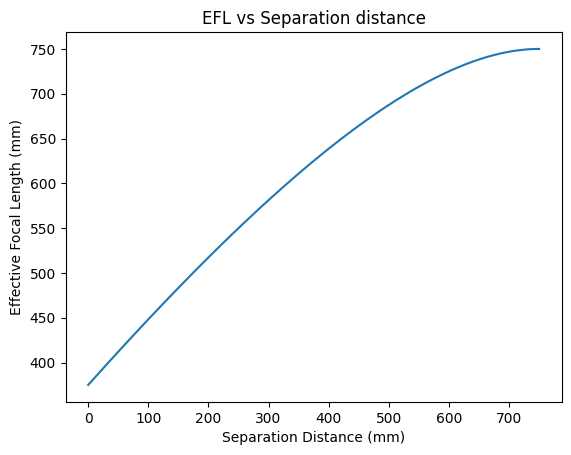

In [91]:
#Can make a simple Plossl lens to generate a 375mm tubelens.
calculate_efl(750, 750, 375)
